# 🚀 Co-working Space Occupancy Demo Notebook
ใช้สำหรับ live demo เพื่อนำเสนอการทำงานของระบบ Occupancy Detection + Dashboard + Forecasting

### ฟีเจอร์ใน Notebook นี้
- Run pipeline เพื่ออัปเดตการตรวจจับ
- ดูข้อมูลล่าสุดจาก `usage_stats.csv`
- แสดงสถานะล่าสุด (People, Tables)
- วาดกราฟ (line chart, hourly average)
- Forecast occupancy (เรียก forecast.py)
- (optional) เปิด Dashboard ด้วย Streamlit

In [1]:
# ----------------------------
# Cell 1: Setup (ติดตั้ง libs)
# ----------------------------
!pip install ultralytics opencv-python-headless pandas matplotlib seaborn streamlit schedule scikit-learn statsmodels prophet google-api-python-client google-auth google-auth-oauthlib


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ----------------------------
# Cell 2: Import + Helper
# ----------------------------
import subprocess, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
# ----------------------------
# Cell 3: Run Pipeline (โหลดภาพจาก Drive + Detect)
# ----------------------------
def run_pipeline():
    print("🚀 Running pipeline...")
    subprocess.run(["python", "pipeline.py"])
    print("✅ Pipeline finished")

# รัน 1 ครั้งเพื่อ demo
run_pipeline()

🚀 Running pipeline...
✅ Pipeline finished


In [4]:
# ----------------------------
# Cell 4: Load and Clean Data
# ----------------------------
df = pd.read_csv("usage_stats.csv", usecols=[0,1,2,3,4,5])

# parse timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# drop invalid
df = df.dropna(subset=["timestamp"])
df.tail(10)

,timestamp,people_count,table_used,table_total,beanbag_used,beanbag_total
3,2025-09-09 23:41:49,0,0,8,0,0
4,2025-09-09 23:50:08,0,0,8,0,0
5,2025-09-10 00:00:08,1,0,8,0,0
6,2025-09-10 00:10:07,1,0,8,0,0
7,2025-09-10 00:20:07,1,0,8,0,0
8,2025-09-10 00:30:08,1,0,8,0,0
9,2025-09-10 00:40:08,1,0,8,0,0
10,2025-09-10 00:50:08,1,0,8,0,0
11,2025-09-10 01:00:08,1,0,8,0,0
12,2025-09-10 01:10:07,1,0,8,0,0


In [5]:
# ----------------------------
# Cell 5: Current Status
# ----------------------------
latest = df.iloc[-1]
print("👥 People:", int(latest["people_count"]))
print("🪑 Tables Used:", f"{latest['table_used']} / {latest['table_total']}")
print("⏰ Last Update:", latest["timestamp"].strftime("%Y-%m-%d %H:%M:%S"))

👥 People: 1
🪑 Tables Used: 0 / 8
⏰ Last Update: 2025-09-10 01:10:07


c:\Users\wator\Documents\AIECO\COAI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


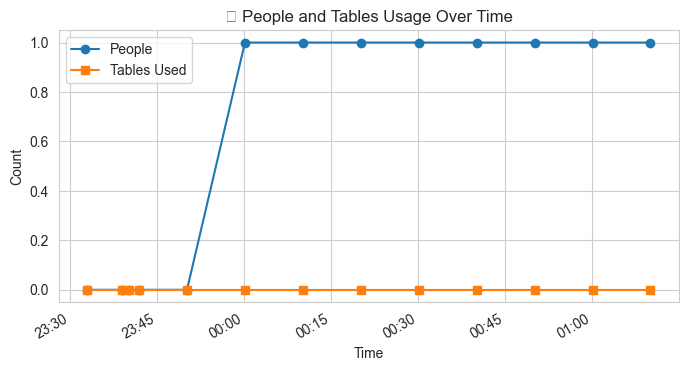

In [6]:
# ----------------------------
# Cell 6: Line Chart (People + Tables)
# ----------------------------
plt.figure(figsize=(8,4))
plt.plot(df["timestamp"], df["people_count"], marker="o", label="People")
plt.plot(df["timestamp"], df["table_used"], marker="s", label="Tables Used")
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("📈 People and Tables Usage Over Time")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.show()

c:\Users\wator\Documents\AIECO\COAI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


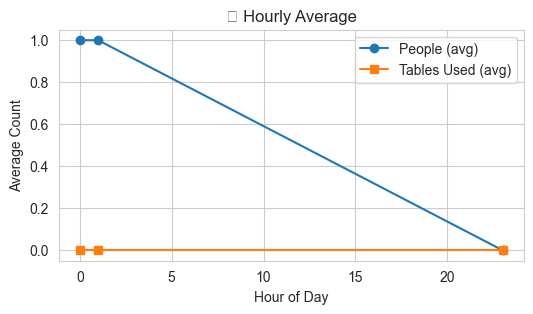

In [7]:
# ----------------------------
# Cell 7: Hourly Average
# ----------------------------
df["hour"] = df["timestamp"].dt.hour
hourly = df.groupby("hour")[["people_count", "table_used"]].mean().reset_index()

plt.figure(figsize=(6,3))
plt.plot(hourly["hour"], hourly["people_count"], marker="o", label="People (avg)")
plt.plot(hourly["hour"], hourly["table_used"], marker="s", label="Tables Used (avg)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.title("⏳ Hourly Average")
plt.legend()
plt.show()

In [8]:
# ----------------------------
# Cell 8: Raw Data
# ----------------------------
df[["timestamp", "people_count", "table_used", "table_total"]].tail(20)

,timestamp,people_count,table_used,table_total
0,2025-09-09 23:32:51,0,0,8
1,2025-09-09 23:38:58,0,0,8
2,2025-09-09 23:40:07,0,0,8
3,2025-09-09 23:41:49,0,0,8
4,2025-09-09 23:50:08,0,0,8
5,2025-09-10 00:00:08,1,0,8
6,2025-09-10 00:10:07,1,0,8
7,2025-09-10 00:20:07,1,0,8
8,2025-09-10 00:30:08,1,0,8
9,2025-09-10 00:40:08,1,0,8


In [18]:
# ----------------------------
# Cell X: Run Pipeline Once (Manual)
# ----------------------------
import subprocess

def job():
    print("🚀 Running pipeline...")
    subprocess.run(["python", "pipeline.py"])
    print("✅ Pipeline finished.")

# เรียกฟังก์ชันนี้เพื่อรัน pipeline ครั้งเดียว
job()

🚀 Running pipeline...
✅ Pipeline finished.


In [19]:
# ----------------------------
# Cell Y: Auto Run Pipeline Every 10 Minutes with Countdown
# ----------------------------
import time

INTERVAL = 600  # 600 วินาที = 10 นาที

while True:
    job()  # รัน pipeline
    print(f"⏳ Waiting {INTERVAL//60} minutes until next run...\n")
    
    # นับถอยหลัง
    for remaining in range(INTERVAL, 0, -1):
        mins, secs = divmod(remaining, 60)
        print(f"   Next run in: {mins:02d}:{secs:02d}", end="\r")
        time.sleep(1)
    print()  # เว้นบรรทัดตอนเริ่มรอบใหม่

🚀 Running pipeline...
✅ Pipeline finished.
⏳ Waiting 10 minutes until next run...



KeyboardInterrupt: 

In [ ]:
# ----------------------------
# Cell 9: Forecasting (SARIMA / Prophet)
# ----------------------------
!python forecast.py

In [ ]:
# ----------------------------
# Cell 10: Run Dashboard (Streamlit)
# ----------------------------
# เปิด dashboard บน port 8501
!streamlit run dashboard.py --server.headless true --server.port 8501

In [20]:
# ----------------------------
# Cell Z: Run Demo Button (Pipeline + Dashboard + Countdown)
# ----------------------------
import subprocess, time, threading
import ipywidgets as widgets
from IPython.display import display

INTERVAL = 600  # ทุก 10 นาที (600 วินาที)

def run_dashboard():
    """เปิด Streamlit dashboard (background)"""
    subprocess.Popen(["streamlit", "run", "dashboard.py", "--server.headless", "true", "--server.port", "8501"])

def run_pipeline_once():
    """รัน pipeline ครั้งเดียว"""
    print("🚀 Running pipeline...")
    subprocess.run(["python", "pipeline.py"])
    print("✅ Pipeline finished.")

def start_demo(_):
    # รัน pipeline ครั้งแรก
    run_pipeline_once()

    # เปิด dashboard ครั้งแรก
    threading.Thread(target=run_dashboard, daemon=True).start()
    print("📊 Dashboard started on http://localhost:8501")

    # วน loop auto update
    while True:
        print(f"⏳ Waiting {INTERVAL//60} minutes until next run...\n")
        for remaining in range(INTERVAL, 0, -1):
            mins, secs = divmod(remaining, 60)
            print(f"   Next run in: {mins:02d}:{secs:02d}", end="\r")
            time.sleep(1)
        print()  # เว้นบรรทัด
        run_pipeline_once()

# ปุ่ม
button = widgets.Button(description="▶️ Run Demo", button_style="success")
button.on_click(start_demo)
display(button)

Button(button_style='success', description='▶️ Run Demo', style=ButtonStyle())